In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

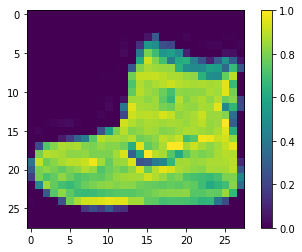

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocessing

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Build Model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1727 - accuracy: 0.9356


In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8829
Test Accuracy 0.8828999996185303


Prediction

Trouser


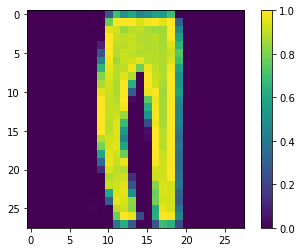

In [60]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick an number to show: 1


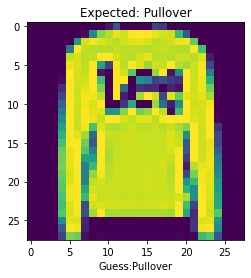

In [65]:
def predict(model, image, actual):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[actual], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title('Expected: ' + label)
  plt.xlabel('Guess:' + guess)
  plt.grid(False)
  plt.show

def get_number():
  while True:
    num = input("Pick an number to show: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try Again.")
  
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)